# Bayesian Linear Regression

## Introduction

The linear regression is one of the most popular statistical models used for predicting an outcome $y$ by using a linear combination of features $x_{1i},\ldots, x_{ki},$ 
$$ f(x_i,\beta) = y_{i} = \beta_{0} + \beta_{1}x_{1i} + \ldots + \beta_{k}x_{ki} + \epsilon_{i},$$
where $i$ is the observation index, and $\epsilon_{i}$ is random noise with mean 0. The frequentist approach to estimating the parameters in the linear regression model is to minimize the sum of squares error, or equivalently maximize the conditional likelihood of $y|x.$ This optimization problem is usually solved by gradient descent which requires a learning rate. Bayesian optimization is a methadology which would help us find a optimal learning rate for gradient descent. However, in this notebook, we will discuss the bayesian approach for estimating the parameters in a linear regression model. In the Bayesian approach, we impose a prior distribution on $\beta$ and use bayes theorem to find a posterior distribution of $\beta$ given the data (more on this below). Instead of selecting parameters that maximize the likelihood of our data, in bayesian we instead maximize the posterior probability of the parameters given the observed data and prior parameter distribution. 

Its good to be fimiliar with the freqentist approach to linear regression which I have discussed in prior notebooks. This notebook will focus on bayesian linear regression and will also review frequentist linear regression. 

## Frequentist vs. Bayesian Statistics

Bayesian analysis is considered to be an approach to statistics in which all types of uncertainties are expressed as probabilities. In bayesian analysis randomness is equivalent to uncertainty, hence if a component of a statistical model is random, that does not mean its generated from a random process, but rather it being unknown. Statistical models deal with unknown parameters, and these are considered to be random variables in bayesian analysis. 

Let us consider the statistical framework of the $\underline{frequentist}$ approach:

${\bf Population}$ is a collection of unknown parameters for which information is wanted. (Ex. The probability of a coin landing on heads)

${\bf Random \ process}$ is a experiment using the given population that can be conceptually repeated and results in certain outcomes. (Ex. Repeatedly flip the coin $n$ times)

${\bf Sample \ space}$ is a set that contains all possible outcomes of the random process. (Ex. Heads or Tails each coin flip)

${\bf Random \ variable}$ is a function that maps values from the sample space to a real number. This is usually a statistic that allows us to learn about the parameters (Ex. Number of heads in $n$ coin flips)

A key point to mention about the frequentist approach is that to do statistical inference, we need think about what happens to our statistics of interest when we take several random samples from the population. That is we need to think about many potential data sets, and not the just the one we have at hand. 

Although the idea of a Population and Sample space is the same in the bayesian approach, let us consider the main differences in statistical framework of the $\underline{bayesian}$ approach:

${\bf Priors}$ distributions for the unknown parameters in the population is assumed before observing the data. (Ex. Probability of coin landing heads is 0.5)

${\bf Experiment}$ is done once and results in data that can be used to learn about the unknown parameters. 

${\bf Posteriors}$ distribution for the parameters are obtained after observing the data using Bayes rule. (Ex. The probability of coin landing on heads is between the prior expected proportion of heads and proportion of heads observed in experiment)

For the frequentist approach, we need to think about what happens to the sample statistic as we repeat the experiment several times, this results in the distribution of the sample statistic. In the bayesian approach the experiment is only done once, and then the bayes rule is used to combine the observed data and prior together into the posterior distributions of the unknown parameters. In the freqentist approach we use the distribution of sample statistics to infer about the population parameters, and in bayesian approach we take draws from the posterior distributions to learn about the parameters. 

A common critique to the bayesian approach is that the results obtained from the data are effected by the prior, which is "subjective". Whereas the freqentist approach only reports what is in the data, and hence it is considered to be "objective". However, for many statistical applications, if a "uninformative" prior (basically a random prior) is chosen, than many proporties (such as mean and variance) of the posterior distribution from the bayesian approach will match the distribution of the sample statistic in the frequentist approach. Priors can also be choosen based of data from other studies (not the same data being analysed), and allows us to incorprate information that may not be in the current data of interest. One could argue the models and assumptions a frequentist uses to fit a given data set are "subjective" in a sense. Therefore the distinguishing factor between frequentist and bayesian analysis isn't as simple as one being "objective" and the other "subjective".

## Frequentist Linear Regression

Suppose we have a data set with $n$ observations, one outcome, and $k$ features. Let $y$ be the outcome variable $y \in \mathbb{R}^{n},$ and $X$ be a feature matrix, $X \in \mathbb{R}^{n \times k},$ and finally let $\epsilon$ be the random noise, $\epsilon \in \mathbb{R}^{n}.$ If now we have parameter vector $\beta \in \mathbb{R}^{k}$ We can represent a linear regression in matrix notiation as $$y = X\beta + \epsilon.$$ Let us further assume that $\epsilon$ is distributed $N(0, \sigma^2 I_{n})$ where $I_n$ is the $n \times n$ identity matrix. Notice that $E(y) = X\beta,$ and $Var(y) = \sigma^2 I_{n},$ this allows to formulate the following conditional distribution of the outcome given the data $$y|x \sim N(X\beta,\sigma^2 I_n).$$ The frequentist approach to estimating $\beta$ is to select one that maximizes the likelihood (MLE = Maximum Likelihood Estimation) of the data, that is 

$$\hat{\beta}_{MLE} = \text{argmax}_{\beta} \left( \frac{1}{(2\pi\sigma^2)^{n/2}}exp(\frac{-||y-X\beta||^2}{2\sigma^2}) \right),$$ where $||.||$ is the euclidean norm. It turns out that the result of this optimization parameter has a closed form, that is $$\hat{\beta}_{MLE} = (X'X)^{-1}X'y.$$ Note we can similarly compute the MLE for the variance $\Sigma = \sigma^2 I_{n}$ as $$ \hat{\Sigma}_{MLE} = \hat{\sigma}_{MLE}^{2}I_{n} = \frac{(y-X\hat{\beta})'(y-X\hat{\beta})}{n-k}I_{n}.$$

## Bayesian Linear Regression With Uninformative Prior

Now that we have reviewed the frequentist approach, let's consider the bayesian approach. We will keep the notation the same as before, but let $\tau^{-1} = \sigma^2,$ hence now $\tau$ can be thought as a measure of precesion as it is the inverse of the variance. To start off, we will need to impose prior distributions on $\beta$ and $\tau.$ Suppose the type of data we are dealing with is new to us, and we don't have any insight about the parameters $(\beta, \tau),$ in this case we can start with a "uniformative" prior. A common example of a "uninformative" prior is the jeffreys prior, $p(\beta,\tau) \propto \frac{1}{\tau}.$ This prior relatively unrestrictive as it is just saying the joint distribution of $(\beta,\tau)$ is uniform. Given this prior, we would next like to derive the posterior distributions $p(\beta|y).$ The posterior distribution takes into account both the prior belief and the observations in the data. 

The Bayes thereom says that the posterior distribution of $\beta$ given the data $y$ is $$p(\beta|y) = \frac{f(y|\beta)\pi(\beta)}{g(y)},$$ where $p(\beta|y)$ is the posterior distribution, $f(y|\beta)$ is the likelihood, $\pi(\beta)$ is the prior, and $g(y)$ is the marginal distribution of the data. Note that $g(y)$ is usually not known, so instead we use $$p(\beta|y) \propto f(y|\beta)\pi(\beta).$$ Given that we started with the "uninformative" jeffreys uniform prior, after many lines of algebra we can compute the posterior distribution for $\beta$ to be $$p(\beta|y) = t_{n-k}(\hat{\beta}_{bayes}, \hat{\Sigma}), $$ which is the multivariate $t$ distribution with mean $$\hat{\beta}_{bayes} = (X'X)^{-1}X'y,$$ and scale matrix $$\hat{\Sigma} = \frac{(y-X\hat{\beta}_{bayes})'(y-X\hat{\beta}_{bayes})}{n-k}(X'X)^{-1}.$$ In the bayesian approach, the point estimates $\hat{\beta}_{bayes}$ are just the mean of the posterior distribution $p(\beta|y).$ Again after some algebra, we can find the posterior distribution of $\tau$ to be $$p(\tau|y) = Gamma(\frac{n-k}{2},\frac{\hat{\Sigma}_{bayes}}{2}),$$ where $$E(p(\tau|y)) = \hat{\Sigma}_{bayes} =  \left(\frac{(y-X\hat{\beta}_{bayes})'(y-X\hat{\beta}_{bayes})}{n-k}\right)^{-1}.$$ Recall that $\tau^{-1} = \sigma^2,$ and so $\tau = \frac{1}{\sigma^2}.$ Therefore the bayes estimate for $\Sigma$ is the mean of the posterior distribution $p(\tau|y).$


Notice that given our "uninformative" prior of $p(\beta,\tau) \propto \frac{1}{\tau},$ the estimated slope coeffecients and variance for the bayesian linear regression exactly match those of the frequentist linear regression. This isn't surprising because our "uinformative" prior did not provide any additional insight to the observed data. 

## Bayesian Linear Regression With Informative Prior

This time we will be using a "informative" prior that provides additional insight to the observed data. Hence the Bayesian linear regression now is expected to differ from the frequentist linear regression. Popular "informative" priors used in the bayesian linear regression are $p(\beta) = N(0, \Lambda^{-1})$ and $p(\tau) = Gamma(\alpha_{1},\alpha_{2}),$ where $\alpha_{1}$ is a shape parameter, and $\alpha_{2}$ is the inverse scale parameter. It turns out that the marginal posterior distributions $p(\beta|y), p(\tau|y)$ are not convenient, but we can still get closed form solutions for the conditional posteriors $p(\beta|y, \tau)$ and $p(\tau|y, \beta).$ After some algebra we can find that $$p(\beta|\tau,y) \propto N((X'X+\tau^{-1}\Lambda)^{-1}X'y, (\tau X'X + \Lambda)^{-1}),$$ and $$p(\tau|y, \beta) = Gamma(\frac{n}{2}+\alpha_{1}, \frac{(y-X\beta)'(y-X\beta)}{2} + \alpha_{2}).$$ Therefore in bayesian regression, the slope coeffecients are $$\hat{\beta}_{bayes} =  E(p(\beta|y,\tau)) = (X'X+\tau^{-1}\Lambda)^{-1}X'y.$$ If we compare this to the freqentist MLE $$\hat{\beta}_{MLE} = (X'X)^{-1}X'y,$$ notice the only different is the bayesian estimate contains this $\tau^{-1}\Lambda$ term. If you recall the regularlization notebook, the bayesian estimate seems to resemble the $L2$ regularization estimate. The intuition for this is that our prior belief $p(\beta) = N(0, \Lambda^{-1})$ actually prevents overfitting in a sense. This is because now if certain features in our linear regression model are recieving large weight and overfitting the data, the bayesian update scales the coeffecients towards $0$ as our prior has mean $E(p(\beta)) = 0.$

We were lucky that in both the above examples we obtained closed form solutions for the posterior distributions of the prameters with "uninformative" and "informative" priors. Note that this is not always guranteed, the priors we used fall under the class of ${\bf conjugate}$ priors. Conjugate priors are those that in conjunction with the likelihood results in closed form posterior distributions. 

## Data and Summary Statistics

Now that we have a basic sense of the bayesian linear regression, we will use it estimate the parameters in a multiple linear regression framework to flexibly model the relationship between IMDB's movies score (rating out of 10) and the movies gross sales (in dollars). We will compare the results from both the frequentist and bayesian approach. The data contains various statistics from IMDB for over 5000 movies. For our purposes we will only be interested in the IMDB rating and gross sales revenue.

In [3]:
# Import dependencies
# numpy for matrix algbera
import numpy as np
# Pandas for data manipulation
import pandas as pd
# matplotlib for data visualization
import matplotlib.pyplot as plt

In [4]:
# Load the IMDB data
movie_data = pd.read_csv("movie_metadata.csv")

# Show structure of data set
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Data Cleaning

Let's clean the data set a little bit. We will only keep the US movies since some of the gross revenues for movies from other countries are not reported in dollars. We will also only keep the imdb score and gross revenue variables for our analysis and drop the rest. I also informally convert the movie gross sales revenue in terms of 2017 dollar by assuming a $2.5\%$ yearly inflation rate. (To formally convert to 2017 dollars we would need to use consumer price index data from the US bureau of labour statistics) Also since we are dealing with real data, we need to take missing values into consideration. Finally, for the purposes of illustrating overfitting on a scatter plot, we will be randomly dropping $90\%$ of the data (this is ofcourse not recommended in practice).

In [5]:
# Drop rows with missing gross revenue data (standard practice in regression analysis)
movie_data = movie_data.dropna(subset = ['gross'])

# Only keep data on movies from the US
movie_data = movie_data[movie_data['country'] == "USA"]

# Assuming a average US inflation rate of 2.5%, we convert gross revenue in terms of 2017 dollars
movie_data[['gross']] = (1.025**(2017-movie_data['title_year']))*movie_data['gross']

# Only keep the variables of interest, 'imdb_score' and 'gross'
movie_data = movie_data[['gross','imdb_score']]

# Let's scale the gross revenue to be in millions of dollars so its easier to read
movie_data[['gross']] = movie_data[['gross']]/1000000

# Randomly drop 90% of the data so overfitting from high degree polynomial can be seen on scatter plot
# This is not done in practice, we are just doing it to better visualize bayesian regression

# Set seed so we get same random allocation on each run of code
np.random.seed(2017)

# Add column vector with observations generated randomly from U[0,1] distribution
movie_data["uniform"] = list(np.random.uniform(0,1, len(movie_data.index)))

# Only keep observations if uniform < 0.1 (this is randomly dropping 90% of data)
movie_data = movie_data[movie_data["uniform"] < 0.1]

# Drop uniform column, we just added it in to randomly drop 90% of observations
movie_data = movie_data[['gross','imdb_score']]
 
# Summary statistics (mean, stdev, min, max)
movie_data.describe()

,gross,imdb_score
count,303.000000,303.000000
mean,73.772574,6.371947
std,122.921231,1.050058
min,0.014931,2.100000
25%,9.921675,5.800000
50%,35.337785,6.500000
75%,82.631405,7.100000
max,1079.311263,9.300000


## Implement Frequentist and Bayesian regression

In [6]:
# Implement closed form solutions for linear and bayesian regression
def estimate_model(y,X,bayes):
    
    # X transpose
    Xtranspose = np.matrix.transpose(X)
    
    # Closed form solution is BetaHat = inv(X'X + bayes)*X'y
    # Estimate model parameters (if bayes = 0, we get standard square loss function result)
    BetaHat = np.dot(np.linalg.inv(np.add(np.dot(Xtranspose,X),bayes)),np.dot(Xtranspose,y))
    
    return BetaHat

In [7]:
# Define outcome vector (gross movie sales revenue)
outcome = np.array(movie_data['gross'])

# Define covariate (IMDB movie rating)
imdb_score = np.array(movie_data['imdb_score'])

# Vector of ones (for B0)
ones = np.ones(len(outcome))

In [8]:
# Estimate a five degree linear regression model (using standard square loss function)
# Mutiple linear regression is y = B0 + B1*x + B2*x^2 + ... + B5*x^5

# Define higher order covariates 
imdb_score2 = np.power(imdb_score,2)
imdb_score3 = np.power(imdb_score,3)
imdb_score4 = np.power(imdb_score,4)
imdb_score5 = np.power(imdb_score,5)

# Define design matrix
design_multiple = np.column_stack((ones,imdb_score, imdb_score2, imdb_score3, imdb_score4, imdb_score5))

# Estimate (Beta0, Beta1, Beta2, Beta3, Beta4, and Beta5) for multiple linear regression model
betahat_multiple = estimate_model(outcome,design_multiple,0)
print (betahat_multiple)

[ 3.04527272e+03 -3.43064838e+03  1.43909991e+03 -2.83201927e+02
  2.64343145e+01 -9.39844527e-01]


Now that we have implement the frequentist approach, we will assume the prior distribution $\beta \sim N(0,\frac{1}{3}I_{n})$ and implement the bayesian approach. I hand picked the covariance matrix here, and used a mean of $0$ to say that the slope parameters are some where around $0.$

In [9]:
# Estimate bayesian regression (with informative priors)
# Multiple linear regression is y = B0 + B1*x + B2*x^2 + ... + B5*x^5

# Bayesian component
# Prior is that Beta is N(0,(1/3)*I)
bayes_comp = 3*np.identity(len(design_multiple[1,:]))

# Estimate (Beta0, Beta1, Beta2, Beta3, Beta4, and Beta5) for bayesian regression
betahat_multiple_bayes = estimate_model(outcome,design_multiple,bayes_comp)
print (betahat_multiple_bayes)

[-12.17281212  -3.68857629  27.88433448 -10.84201715   1.47981907
  -0.06392594]


In [10]:
# Code for large images in notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [14,9]

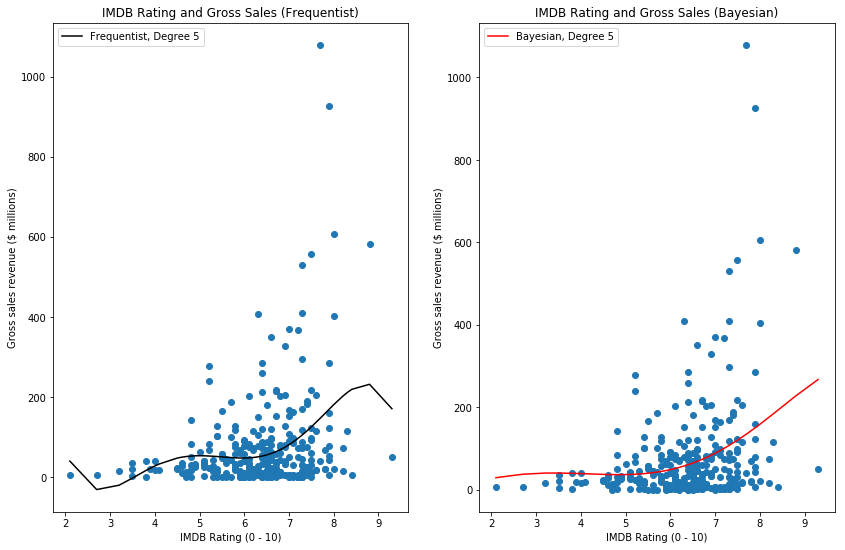

In [11]:
# Visualize simple linear regression (degree 1), figure on the left
plt.subplot(1, 2, 1)
plt.scatter(movie_data['imdb_score'], movie_data['gross'])

# Chart title
plt.title('IMDB Rating and Gross Sales (Frequentist)')

# y-label
plt.ylabel('Gross sales revenue ($ millions)')

# x-label
plt.xlabel('IMDB Rating (0 - 10)')

# Plot multiple linear regression (degree 5)
multiple, = plt.plot(np.sort(imdb_score), betahat_multiple[0] + np.sort(imdb_score)*betahat_multiple[1] 
         + np.sort(imdb_score2)*betahat_multiple[2] + np.sort(imdb_score3)*betahat_multiple[3] 
         + np.sort(imdb_score4)*betahat_multiple[4] + np.sort(imdb_score5)*betahat_multiple[5],'-k')

# Legend for simple linear regression scatter plot, plot on left
plt.legend([multiple], ['Frequentist, Degree 5'])

# Visualize multiple linear regression (degree 5) and bayesian (degree 5), figure on the right
plt.subplot(1, 2, 2)
plt.scatter(movie_data['imdb_score'], movie_data['gross'])

# Chart title
plt.title('IMDB Rating and Gross Sales (Bayesian)')

# y-label
plt.ylabel('Gross sales revenue ($ millions)')

# x-label
plt.xlabel('IMDB Rating (0 - 10)')


# Plot bayesian regression 
bayesian, = plt.plot(np.sort(imdb_score), betahat_multiple_bayes[0] + np.sort(imdb_score)*betahat_multiple_bayes[1] 
        + np.sort(imdb_score2)*betahat_multiple_bayes[2] + np.sort(imdb_score3)*betahat_multiple_bayes[3] 
         + np.sort(imdb_score4)*betahat_multiple_bayes[4] + np.sort(imdb_score5)*betahat_multiple_bayes[5],'r')

# Set legend for plot on the right
plt.legend([bayesian], ['Bayesian, Degree 5'])

# Show scatter plots
plt.show()

From the above figure, we notice the left figure which uses the frequentist linear regression seems to overfit the data. However the figure on the right which takes into account the information from the prior and the data smoothly fits the data. The bayesian regression is able to capture the non-linear pattern between the movie revenues and IMBD rating, however the frequentist regression doesn't seem robust to outliers in the data. 

## Conclusion

In this notebook we discussed freqeuntist and bayesian approaches to statistics and applied them in a linear regression setting. Under the assumption of "uniformative" priors for the slope coeffecients, we showed that the bayesian linear regression is equivalent to the frequentist linear regression. However, if we use "informative" priors for the slope parameters, bayesian regression is analagous to regularization.  That is our prior insight on the slope parameters being around 0 (mean of $p(\beta)$ is 0) prevents the regression model from overfitting the data, because both information in the prior and data are taken into account in the bayesian approach. 